In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

In [2]:
drinking_file = "Resources/drinkingwater.csv"
sani_file = "Resources/sanitization.csv"
life_file = "Resources/lifeexpectancy.csv"
hale_file = "Resources/halelife.csv"

In [3]:
drinking_data = pd.read_csv(drinking_file)
sani_data = pd.read_csv(sani_file)

In [4]:
life_data = pd.read_csv(life_file)
hale_data = pd.read_csv(hale_file)

In [5]:
sani_df= sani_data.rename(columns={"Population using at least basic sanitation services (%)":"Percentage"})
sani_df.head()

,Location,Period,Area,Percentage
0,Afghanistan,2017,Total,43.42
1,Afghanistan,2017,Urban,62.26
2,Afghanistan,2017,Rural,37.05
3,Afghanistan,2016,Total,42.05
4,Afghanistan,2016,Urban,59.92


In [6]:
sani_df['Location'] = sani_df['Location'].replace({
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom', 
    'United States of America': 'United States'})

In [7]:
# sort dataframe by country for drinking water 
display(sani_df.sort_values(['Location'], ascending=True))

,Location,Period,Area,Percentage
0,Afghanistan,2017,Total,43.42
29,Afghanistan,2008,Rural,28.43
30,Afghanistan,2007,Total,30.41
31,Afghanistan,2007,Urban,40.18
32,Afghanistan,2007,Rural,27.48
...,...,...,...,...
9335,Zimbabwe,2010,Total,41.05
9336,Zimbabwe,2010,Urban,55.76
9337,Zimbabwe,2010,Rural,33.75
9326,Zimbabwe,2013,Total,38.94


In [8]:
len(drinking_data["Location"].unique())

195

In [9]:
# count number of countries in the dataframe
drinking_data['Location'].value_counts()

Uruguay               18
Italy                 18
Maldives              18
Mauritania            18
Botswana              18
                      ..
Poland                13
Montenegro            12
Sudan (until 2011)    11
Sudan                  7
South Sudan            7
Name: Location, Length: 195, dtype: int64

In [10]:
# get data of countries insterested for drining water
target_countries = pd.DataFrame(sani_df.query("Location == ['Switzerland', 'Canada', 'Japan', 'Germany', 'Australia', 'United Kingdom', 'United States', 'Liberia', 'Nigeria', 'Madagascar']"))
target_countries

,Location,Period,Area,Percentage
394,Australia,2017,Total,99.99
395,Australia,2016,Total,99.99
396,Australia,2015,Total,99.99
397,Australia,2014,Total,99.99
398,Australia,2013,Total,99.99
...,...,...,...,...
8972,United States,2001,Urban,99.99
8973,United States,2001,Rural,99.88
8974,United States,2000,Total,99.97
8975,United States,2000,Urban,99.99


In [11]:
# get data of years 2000 and 2010 for drinking water
year_2000 = pd.DataFrame(target_countries.query("Period == '2000'"))
year_2010 = pd.DataFrame(target_countries.query("Period == '2010'"))

years = [year_2000,year_2010]

for year in years:
    display(year.sort_values(['Percentage'], ascending=True))

,Location,Period,Area,Percentage
4960,Madagascar,2000,Rural,2.73
4780,Liberia,2000,Rural,4.12
4958,Madagascar,2000,Total,4.55
4959,Madagascar,2000,Urban,9.43
4778,Liberia,2000,Total,13.52
4779,Liberia,2000,Urban,25.32
6163,Nigeria,2000,Rural,29.22
6161,Nigeria,2000,Total,29.52
6162,Nigeria,2000,Urban,30.06
3304,Germany,2000,Rural,98.99


,Location,Period,Area,Percentage
4930,Madagascar,2010,Rural,5.00
4750,Liberia,2010,Rural,5.08
4928,Madagascar,2010,Total,7.90
4929,Madagascar,2010,Urban,14.08
4748,Liberia,2010,Total,15.92
4749,Liberia,2010,Urban,27.75
6133,Nigeria,2010,Rural,30.10
6131,Nigeria,2010,Total,34.31
6132,Nigeria,2010,Urban,39.78
3274,Germany,2010,Rural,98.99


In [12]:
# get data for urban and rural only
year_2000_RU = pd.DataFrame(year_2000.query("Area == ['Urban', 'Rural']"))
year_2010_RU = pd.DataFrame(year_2010.query("Area == ['Urban', 'Rural']"))

In [13]:
# print out countries of target
countries = target_countries['Location'].unique()
countries 

array(['Australia', 'Canada', 'Germany', 'Japan', 'Liberia', 'Madagascar',
       'Nigeria', 'Switzerland', 'United Kingdom', 'United States'],
      dtype=object)

In [14]:
# drinking_data.sort_values(['Location'], ascending=True)
# # display(new_df.sort_values(['Percentage']), ascending=True)

In [15]:
# # Bar chart for Period and Life Expectancy (years)
# x_axis = life_compare_df[“Period”]
# y_axis = life_compare_df[“Life (years)“]
# fig1, ax1 = plt.subplots()
# ax1.set_title(“Period VS Life Expectancy (years)“)
# ax1.set_xlabel(“Period”)
# ax1.set_ylabel(“Life Expectancy (years)“)
# plt.ylim(35,50)
# plt.show()

In [16]:
# countries = life_data["Location"].unique()
# display(countries)
# # countries.sort_values(["Location"], ascending=True)
# # display(drinking_data.sort_values(['Location'], ascending=True))

In [17]:
# # drinking_data['Period' == "2017"]
# # drinking_perc_df.query("Period == '2017'")
# year_2017 = pd.DataFrame(drinking_perc_df.query("Period == '2017'"))
# display(year_2017)

In [18]:
# display(year_2017.sort_values(['Percentage'], ascending=True))


In [19]:
# display(df.sort_values(['Percentage'], ascending=False))


In [20]:
# year_2000 = pyear_2000d.DataFrame(drinking_perc_df.query("Period == '2000'"))
# display(year_2000)


In [21]:
# display(year_2000.sort_values(['Percentage'], ascending=False))


In [22]:
# life_results = pd.merge(life_data, hale_data, how="left", on=["Location"])


In [23]:
# life_results

In [24]:
# len(drinking_data["Location"].unique())


In [25]:
# water_bar = drinking_data['Location'].value_counts()
#     # "clean_merged_dataset['Drug Regimen'].value_counts()" counts how many times each regimen appears in the column "Drug Regimen"
# display(water_bar)

# water_bar.plot.bar(color = 'red', alpha = 0.5, width = 0.5)
#     # alpha gives the shade of the color, ranging between 0-1

# plt.title('water_bar')
# plt.xlabel("Drug Regimen")
# plt.ylabel("Regimen Counts")


In [26]:
target_areas = pd.DataFrame(sani_df.query("Location == ['Switzerland', 'Canada', 'Japan', 'Germany', 'Australia', 'United Kingdom', 'United States', 'Liberia', 'Nigeria', 'Madagascar']"))
target_areas.head()

,Location,Period,Area,Percentage
394,Australia,2017,Total,99.99
395,Australia,2016,Total,99.99
396,Australia,2015,Total,99.99
397,Australia,2014,Total,99.99
398,Australia,2013,Total,99.99


In [27]:
target_df = target_areas[target_areas["Area"] == 'Total']
target_df.head()

,Location,Period,Area,Percentage
394,Australia,2017,Total,99.99
395,Australia,2016,Total,99.99
396,Australia,2015,Total,99.99
397,Australia,2014,Total,99.99
398,Australia,2013,Total,99.99


In [28]:
areas = target_df['Location'].unique()
areas

array(['Australia', 'Canada', 'Germany', 'Japan', 'Liberia', 'Madagascar',
       'Nigeria', 'Switzerland', 'United Kingdom', 'United States'],
      dtype=object)

In [29]:
# target_countries = pd.merge(target_countries, target_area, on = ['Location'], how= 'left')
                                                            

# # merged_target_df = merged_sani_df.reset_index()
# target_countries

In [30]:
# import datetime as dt
# target_df['Period'] = [dt.datetime.strptime(str(period), '%Y') for period in target_df['Period']]

# target_df.head()

In [31]:
# countries = target_countries['Location'].unique()
# countries

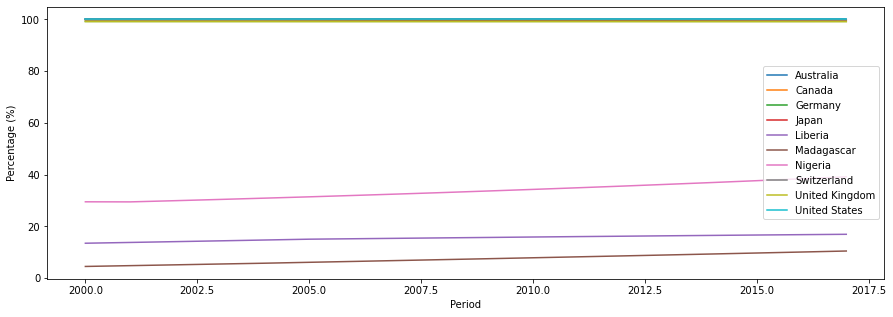

In [32]:
plt.figure(figsize=(15,5)) 

for area in areas:
    df = target_df[target_df['Location']==area]
    plt.plot(df['Period'],df['Percentage'],label=area)
plt.xlabel("Period")
plt.ylabel('Percentage (%)')
plt.legend()    
plt.show()

In [33]:
year_2000 = target_df[target_df["Period"] == '2000']
year_2010 = target_df[target_df["Period"] == '2010']
year_2010.head()
# # year_2010 = pd.DataFrame(target_df.query("Period == '2010'"))

# # target_df = target_areas[target_areas["Area"] == 'Total']
# # target_df.head()

# years = [year_2000,year_2010]

# for year in years:
#     display(year.sort_values(['Percentage'], ascending=True))

,Location,Period,Area,Percentage


In [34]:
# merged_sani_df = pd.merge(year_2000, year_2010, on = "Location", how= "left")

# merged_sani_df = merged_sani_df.reset_index()
# merged_sani_df

In [35]:
sns_sani_df = pd.concat([year_2000, year_2010])
sns_sani_df

,Location,Period,Area,Percentage


In [36]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x="Location", 
            y="Percentage", 
            hue="Period", 
            data=sns_sani_df)
plt.ylabel("'Percentage (%)", size=14)
plt.xticks(rotation=45)
plt.xlabel("Location", size=14)
plt.title('2000 vs 2010 Percentage of Basic Drinking Water Comparison', size=18)
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")

ValueError: min() arg is an empty sequence

<Figure size 720x360 with 0 Axes>

In [ ]:
#rural = target_areas[target_areas["Area"] == 'Rural']
#urban = target_areas[target_areas["Area"] == 'Urban']
location_df = target_areas[target_areas['Period']==2010]
clean_location_df = location_df[location_df['Area'].isin(['Rural','Urban'])]
clean_location_df

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Location", 
            y="Percentage", 
            hue="Area", 
            data=clean_location_df)
plt.ylabel("'Percentage (%)", size=14)
plt.xlabel("Location", size=14)

plt.xticks(rotation=45)

plt.title('2010 Rural vs Urban Comparison', size=18)

In [ ]:
location_df = target_areas[target_areas['Period']==2000]
clean_location_df = location_df[location_df['Area'].isin(['Rural','Urban'])]
clean_location_df

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Location", 
            y="Percentage", 
            hue="Area", 
            data=clean_location_df)
plt.ylabel("'Percentage (%)", size=14)
plt.xlabel("Location", size=14)

plt.xticks(rotation=45)

plt.title('2000 Rural vs Urban Comparison', size=18)